# 문서 분류(Document Classification)

## 데이터 준비

* 문서 분류에 필요한 데이터는 `scikit-learn`이 제공하는 20개의 주제를 가지는 뉴스그룹 데이터를 사용
* 텍스트는 `CounterVectorizer`를 거쳐 DTM 행렬로 변환
* DTM 행렬은 문서에 등장하는 단어들을 빈도 수 별로 표현한 행렬


In [3]:
# DTM = documnet term matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

news = fetch_20newsgroups()

x = news.data
y = news.target

cv = CountVectorizer()
x = cv.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7919, 130107) (7919,) (3395, 130107) (3395,)


In [4]:
print(x_train[0])

  (0, 56979)	2
  (0, 50527)	3
  (0, 111322)	1
  (0, 123984)	1
  (0, 68532)	5
  (0, 114731)	4
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	5
  (0, 76032)	1
  (0, 65798)	1
  (0, 114579)	2
  (0, 80638)	1
  (0, 89860)	1
  (0, 114455)	15
  (0, 90686)	2
  (0, 68766)	8
  (0, 115475)	10
  (0, 32311)	3
  (0, 99822)	1
  (0, 66608)	1
  (0, 73201)	1
  :	:
  (0, 56591)	1
  (0, 55825)	1
  (0, 82497)	1
  (0, 51115)	1
  (0, 16249)	1
  (0, 56590)	1
  (0, 53551)	1
  (0, 99921)	1
  (0, 105399)	1
  (0, 119948)	1
  (0, 113185)	1
  (0, 105395)	1
  (0, 34297)	1
  (0, 27000)	1
  (0, 111349)	1
  (0, 25374)	1
  (0, 34434)	2
  (0, 48894)	1
  (0, 26201)	1
  (0, 100464)	1
  (0, 110015)	2
  (0, 73116)	1
  (0, 105006)	1
  (0, 4238)	1
  (0, 76219)	1


## scikit-learn을 이용한 문서 분류

In [5]:
from sklearn.metrics import accuracy_score

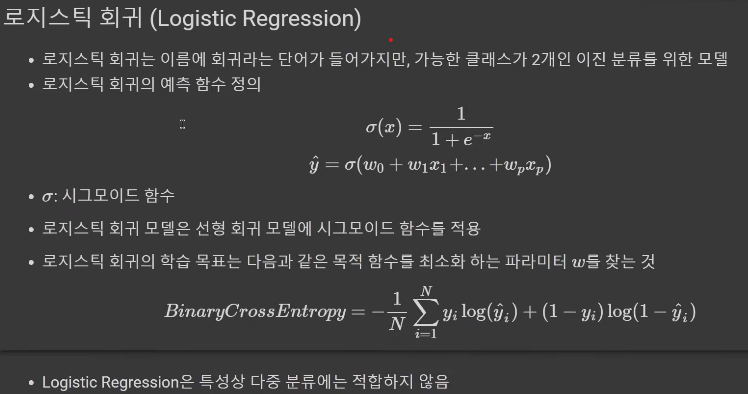

### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [6]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
acc =accuracy_score(pred, y_test) # 예측값과 실제값 비교
print(acc)

0.8683357879234168


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


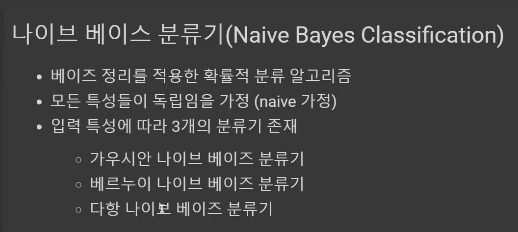

### Naive Bayes

#### DTM을 이용한 Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train, y_train)
pred= NB.predict(x_test)
acc = accuracy_score(pred, y_test)
acc

0.8179675994108984

#### tf-idf를 이용한 정확도 향상

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.fit_transform(x_test)

NB.fit(x_train_tf, y_train)
pred = NB.predict(x_test_tf)
acc = accuracy_score(pred, y_test)
print(acc)

0.8144329896907216


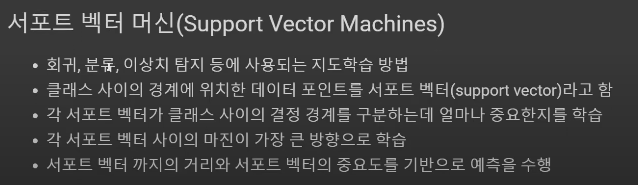

### Support Vector Machine

In [7]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)
pred = SVM.predict(x_test)
acc =accuracy_score(pred, y_test)
print(acc)

0.8220913107511045


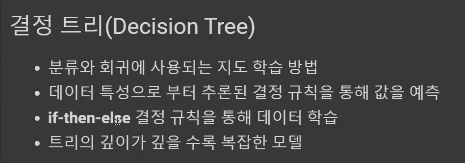

### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
pred= DT.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.6385861561119293


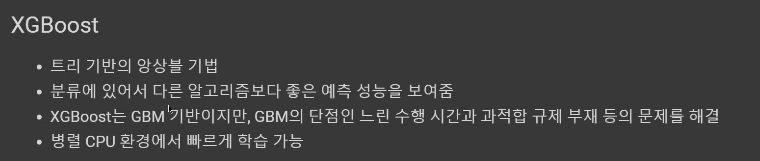

### XGBoost

In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=30, learning_rate=0.05, max_depth=3)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.7128129602356407


##교차 검증

* 일반 검증은 학습 데이터가 테스트 데이터로 사용되지 않음
* 교차 검증은 데이터를 n개의 집합으로 나누어 정확도를 계산해 학습 데이터로 사용된 데이터도 테스트 데이터로 사용
* 교차 검증을 사용하면 일반 검증보다 모델의 일반화가 잘 되어 있는지 평가 가능
* 앞서 구성한 나이브 베이즈 모델을 교차 검증

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(NB, x, y, cv=5) # 5개의 집합으로 구분
print(scores, scores.mean())

[0.83870968 0.83826779 0.82368537 0.83031374 0.83642794] 0.833480903927519


* 교차 검증을 통해 일반 검증보다 좀 더 일반화된 모델 생성 가능
* 교차 검증은 일반 검증에 비해 n번 검증을 해 비용이 더 많이 소요

## 정밀도와 재현률 

* 정밀도(precision)는 양성 클래스(정답)으로 예측한 샘플이 양성 클래스일 확률을 의미
* 모델이 얼마나 양성 클래스를 잘 예측하는지를 나타냄
* 재현률(recall)은 양성 클래스인 샘플에서 모델이 양성 클래스로 예측한 샘플 비율을 의미하며, 모델이 얼마나 실제 상황을 재현하는지를 나타냄
* 정밀도와 재현율의 가중조화평균인 F1-score라는 지표는 정확도에 비해 더 효과적인 모델 분석 지표로 알려져 있음
* 직접 계산할 수도 있으나, scikit-learn은 이를 편리하게 계산해주는 함수를 제공

* 다중 클래스 분류 문제에서 정밀도와 재현률을 계산할 때는 클래스간의 지표를 어떻게 합칠지 지정 필요

  * None - 클래스간 지표를 합치지 말고 그대로 출력
  * micro - 정밀도와 재현률이 같음, 이로 인해 f1-score도 정밀도, 재현률과 동일
  * macro - 클래스간 지표를 단순 평균한 값
  * weighted - 클래스간 지표를 가중 평균한 값

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(pred, y_test, average='micro')
recall = recall_score(pred, y_test, average='micro')
f1 = f1_score(pred, y_test, average='micro')

print(precision, recall, f1)

0.8144329896907216 0.8144329896907216 0.8144329896907216


In [17]:
precision = precision_score(pred, y_test, average='macro')
recall = recall_score(pred, y_test, average='macro')
f1 = f1_score(pred, y_test, average='macro')

print(precision, recall, f1)

0.8004623000161629 0.8627529886087405 0.8010188402205218


## 그리드 검색을 이용한 파라미터 최적화

* 그리드 검색을 사용하면 분류기에 사용하는 파라미터 최적화 가능
* 그리드 검색을 통해 앞서 구성한 나이브 베이즈 모델의 'alpha' 파라미터를 최적화시키는 예제

* `estimator`: 사용 모델 객체     
* `param_grid`: 사용 객체:지정 파라미터 리스트로 구성된 딕셔너리    
* `scoring`: 최적화하고자 하는 성능 지표   
* `cv`: 교차 검증 분할 개수      

In [20]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator=NB, param_grid={'alpha': [0.001, 0.01, 0.1, 1.]}, scoring='accuracy', cv=10)
GS.fit(x, y)
# 'alpha': [0.001, 0.002, 0.003, 0.004, 0.005]}
print(GS.best_score_)
print(GS.best_params_)

0.8897820965842167
{'alpha': 0.001}
